In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import style

In [235]:
# def get_data(sample_num=2000):
#     observed_r = np.random.uniform(low=0, high=5, size=(sample_num,)) # observed_r
#     predicted_r = np.random.uniform(low=0, high=5, size=(sample_num,)) # predicted rating
# #     imputed_e = np.power((predicted_r - 0.5), 2)*0.3 ## e_hat_ui = 0.3*(r_ui - 0.5)^2
    
#     observed_e = predicted_r - observed_r # e_ui
#     propensities = np.random.uniform(low=0, high=1, size=(sample_num,)) # propensities for observed X_ui
   
#     return observed_r, predicted_r, observed_e, propensities

In [259]:
def get_data():
    observed_r = pd.read_csv("preproceed_data/rating_pairs.csv") # observed ratings
    predicted_r = pd.DataFrame(np.random.randint(0,5,size=observed_r.shape)) # predicted rating
    
    
    observed_e = predicted_r - observed_r # e_ui
    propensities = pd.read_csv("preproceed_data/propensities.csv") # propensities for all user item pairs
    O_mask = pd.read_csv("preproceed_data/O_mask.csv")
   
    return observed_r, predicted_r, observed_e, propensities, O_mask

In [260]:
get_data()

(     user_id    1    2    3    4    5    6    7    8    9  ...  1673  1674  \
 0          1  5.0  3.0  4.0  3.0  3.0  5.0  4.0  1.0  5.0  ...   NaN   NaN   
 1          2  4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
 2          3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
 3          4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
 4          5  4.0  3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
 ..       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
 938      939  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  5.0  ...   NaN   NaN   
 939      940  NaN  NaN  NaN  2.0  NaN  NaN  4.0  5.0  3.0  ...   NaN   NaN   
 940      941  5.0  NaN  NaN  NaN  NaN  NaN  4.0  NaN  NaN  ...   NaN   NaN   
 941      942  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
 942      943  NaN  5.0  NaN  NaN  NaN  NaN  NaN  NaN  3.0  ...   NaN   NaN   
 
      1675  1676  1677  1678  1679  1680  1681  16

In [254]:
def SGD(predicted_r,
        observed_e,
        propensities,
        step_size=2,
        max_iter_count=3000):

    m = predicted_r.shape[0]
    var = 1
    theta = np.zeros(2)
    loss = 1
    iter_count = 0
    iter_list = []
    loss_list = []
    theta1 = []
    theta2 = []
    theta = [2, 4.5]

    
    while loss > 0.01 and iter_count < max_iter_count:
        loss = 0
        theta1.append(theta[0])
        theta2.append(theta[1])
        rand1 = np.random.randint(0, m, 1)

        gradient_w = 2 * predicted_r[rand1] * (
            2 * theta[1] - predicted_r[rand1]) * (
                (2 * predicted_r[rand1] * theta[1] - predicted_r[rand1]**2) *
                theta[0] + observed_e[rand1] - theta[1]**2) 

        gradient_y = 4 * (theta[1] - theta[0] * predicted_r[rand1]) * (
            theta[1]**2 - 2 * predicted_r[rand1] * theta[0] * theta[1] -
            observed_e[rand1] + theta[0] * predicted_r[rand1]**2) 
        
        gradient = [gradient_w, gradient_y]
        
        for i in range(len(theta)):
            theta[i] = theta[i] - step_size * gradient[i]
        h = np.power((predicted_r - theta[1]), 2) * theta[0]
        
        for i in range(m):
            every_loss = np.power((h[i] - observed_e[i]), 2) 
            loss = loss + every_loss

        print("iter_count: ", iter_count, "the loss:", loss, "the gradient:",
              gradient)

        iter_list.append(iter_count)
        loss_list.append(loss)

        iter_count += 1

    plt.plot(iter_list, loss_list)
    plt.xlabel("iter")
    plt.ylabel("loss")
    plt.show()
    return theta1, theta2, theta, loss_list

iter_count:  0 the loss: 584242.3745123724 the gradient: [array([861.91725968]), array([271.0307244])]
iter_count:  1 the loss: 585646.5294144464 the gradient: [array([-51.89380531]), array([25.54999327])]
iter_count:  2 the loss: 581062.413343122 the gradient: [array([-126.61601115]), array([193.54517763])]
iter_count:  3 the loss: 520723.29584202264 the gradient: [array([827.45076017]), array([270.59001594])]
iter_count:  4 the loss: 498267.5029376403 the gradient: [array([402.55583866]), array([31.47163625])]
iter_count:  5 the loss: 472673.23027911194 the gradient: [array([442.26146824]), array([66.76200968])]
iter_count:  6 the loss: 469959.6139419952 the gradient: [array([62.6062053]), array([-7.75074369])]
iter_count:  7 the loss: 471932.4228995653 the gradient: [array([-113.05842858]), array([73.440099])]
iter_count:  8 the loss: 434246.08433966315 the gradient: [array([573.27113143]), array([216.05576783])]
iter_count:  9 the loss: 392872.14558213373 the gradient: [array([688.

iter_count:  110 the loss: 106535.79263561976 the gradient: [array([-108.28453183]), array([128.57012277])]
iter_count:  111 the loss: 105250.02189253474 the gradient: [array([-63.56258866]), array([186.70713437])]
iter_count:  112 the loss: 104653.51321794672 the gradient: [array([-95.85230117]), array([167.21205138])]
iter_count:  113 the loss: 102289.99539794191 the gradient: [array([139.49882281]), array([33.25882485])]
iter_count:  114 the loss: 101539.43502373561 the gradient: [array([53.20444902]), array([0.33418789])]
iter_count:  115 the loss: 102051.76410163988 the gradient: [array([-71.21723444]), array([42.36533723])]
iter_count:  116 the loss: 101595.920682049 the gradient: [array([35.51100091]), array([-3.57362485])]
iter_count:  117 the loss: 101430.05635384128 the gradient: [array([-98.11244076]), array([133.70470156])]
iter_count:  118 the loss: 99331.39787313975 the gradient: [array([145.41674766]), array([8.66800348])]
iter_count:  119 the loss: 99171.33551705588 the

iter_count:  220 the loss: 58764.280375553324 the gradient: [array([22.65944048]), array([6.5537903])]
iter_count:  221 the loss: 58772.044602363276 the gradient: [array([-0.891983]), array([-0.11386859])]
iter_count:  222 the loss: 58286.056719845976 the gradient: [array([52.44092688]), array([11.24452894])]
iter_count:  223 the loss: 58121.27865565834 the gradient: [array([24.55278547]), array([-3.92316255])]
iter_count:  224 the loss: 58155.73838417868 the gradient: [array([-4.6671265]), array([0.27741497])]
iter_count:  225 the loss: 58341.33114893522 the gradient: [array([-67.69329836]), array([50.55390478])]
iter_count:  226 the loss: 57210.608158620715 the gradient: [array([-1.5217833]), array([170.64422177])]
iter_count:  227 the loss: 57505.887350115365 the gradient: [array([-45.03115675]), array([7.09759922])]
iter_count:  228 the loss: 57497.451114945245 the gradient: [array([0.78286301]), array([0.37111297])]
iter_count:  229 the loss: 56704.32086704705 the gradient: [array

iter_count:  333 the loss: 46934.06398438378 the gradient: [array([-30.3688331]), array([70.07958103])]
iter_count:  334 the loss: 47052.636931273 the gradient: [array([-10.0549449]), array([-11.3415781])]
iter_count:  335 the loss: 47202.24334201699 the gradient: [array([-45.82398187]), array([21.49022303])]
iter_count:  336 the loss: 47102.689042469116 the gradient: [array([12.38418668]), array([5.23344954])]
iter_count:  337 the loss: 47095.2046259428 the gradient: [array([-63.6056857]), array([69.87579688])]
iter_count:  338 the loss: 46829.789062687385 the gradient: [array([37.85349394]), array([9.0775325])]
iter_count:  339 the loss: 46975.521433766866 the gradient: [array([-44.81430636]), array([20.84199994])]
iter_count:  340 the loss: 46926.85914702977 the gradient: [array([5.90489056]), array([2.79200882])]
iter_count:  341 the loss: 46886.93001986025 the gradient: [array([9.19351099]), array([-2.38286889])]
iter_count:  342 the loss: 46823.35077677334 the gradient: [array([-

iter_count:  444 the loss: 39361.64816367605 the gradient: [array([-38.79656227]), array([42.27120887])]
iter_count:  445 the loss: 39295.75377707845 the gradient: [array([-37.33650421]), array([59.57137422])]
iter_count:  446 the loss: 39258.10499434218 the gradient: [array([7.14407131]), array([1.01969163])]
iter_count:  447 the loss: 39169.205881341906 the gradient: [array([9.18101995]), array([11.38055128])]
iter_count:  448 the loss: 39250.620504879786 the gradient: [array([-22.87821182]), array([6.40228064])]
iter_count:  449 the loss: 39463.73411918963 the gradient: [array([-20.07268189]), array([-29.36033114])]
iter_count:  450 the loss: 39441.985292706406 the gradient: [array([5.20681384]), array([-0.68203587])]
iter_count:  451 the loss: 39369.121153821325 the gradient: [array([6.31747235]), array([10.64075613])]
iter_count:  452 the loss: 39362.455193609334 the gradient: [array([-33.63092429]), array([40.72529221])]
iter_count:  453 the loss: 39394.65586584837 the gradient: 

iter_count:  557 the loss: 34156.55763107368 the gradient: [array([17.45089936]), array([11.76186893])]
iter_count:  558 the loss: 33988.086176193276 the gradient: [array([-19.76370272]), array([80.46170587])]
iter_count:  559 the loss: 34006.008136080476 the gradient: [array([-24.57778305]), array([26.99786322])]
iter_count:  560 the loss: 33846.36894611579 the gradient: [array([27.40403621]), array([15.4548689])]
iter_count:  561 the loss: 33884.37291831759 the gradient: [array([-10.24218311]), array([1.286921])]
iter_count:  562 the loss: 33999.18031849769 the gradient: [array([-44.37528481]), array([21.97572786])]
iter_count:  563 the loss: 33780.77512078771 the gradient: [array([47.60016736]), array([7.75095766])]
iter_count:  564 the loss: 33777.682263870534 the gradient: [array([0.50468467]), array([0.34052524])]
iter_count:  565 the loss: 33870.69013228174 the gradient: [array([-6.96726349]), array([-21.23434813])]
iter_count:  566 the loss: 33960.36194894276 the gradient: [arr

iter_count:  673 the loss: 32269.95232320339 the gradient: [array([24.81320403]), array([-2.62151694])]
iter_count:  674 the loss: 32043.518037889025 the gradient: [array([46.76633099]), array([18.57729745])]
iter_count:  675 the loss: 31909.366134364413 the gradient: [array([20.34366483]), array([23.2558568])]
iter_count:  676 the loss: 31942.179358072586 the gradient: [array([-2.35260365]), array([-9.98397589])]
iter_count:  677 the loss: 31964.29472493828 the gradient: [array([-5.70763274]), array([-0.01387531])]
iter_count:  678 the loss: 32047.373069490113 the gradient: [array([-8.7506776]), array([-20.58506832])]
iter_count:  679 the loss: 32169.570444106535 the gradient: [array([-44.50295092]), array([21.11040268])]
iter_count:  680 the loss: 32235.8696155548 the gradient: [array([-32.64057255]), array([25.40551898])]
iter_count:  681 the loss: 32163.544182355934 the gradient: [array([15.1230007]), array([5.68885136])]
iter_count:  682 the loss: 32153.51873247428 the gradient: [

iter_count:  782 the loss: 30780.253302373392 the gradient: [array([-0.94482811]), array([-0.08221982])]
iter_count:  783 the loss: 30803.98314839962 the gradient: [array([-5.09796588]), array([-2.73274454])]
iter_count:  784 the loss: 30740.187468132022 the gradient: [array([17.56087193]), array([-1.52662981])]
iter_count:  785 the loss: 30656.759289151152 the gradient: [array([-12.57360877]), array([81.37737986])]
iter_count:  786 the loss: 30674.487357276477 the gradient: [array([-18.17276094]), array([32.43718074])]
iter_count:  787 the loss: 30728.965867993556 the gradient: [array([-8.43045383]), array([-14.52569395])]
iter_count:  788 the loss: 30735.023092268384 the gradient: [array([-1.64302409]), array([0.09393802])]
iter_count:  789 the loss: 30684.931900883497 the gradient: [array([14.30134868]), array([-2.48057032])]
iter_count:  790 the loss: 30798.662729161693 the gradient: [array([-36.63819543]), array([15.78467479])]
iter_count:  791 the loss: 30712.581619916342 the gra

iter_count:  891 the loss: 31735.719478105697 the gradient: [array([-4.45282277]), array([-22.76574646])]
iter_count:  892 the loss: 31780.344229691324 the gradient: [array([3.87700229]), array([-51.96022578])]
iter_count:  893 the loss: 31844.672981294905 the gradient: [array([5.72876093]), array([-72.15316802])]
iter_count:  894 the loss: 31816.485181535332 the gradient: [array([7.96138808]), array([-2.29990429])]
iter_count:  895 the loss: 31887.656606610955 the gradient: [array([-21.47088878]), array([10.20055253])]
iter_count:  896 the loss: 31695.533728826274 the gradient: [array([44.79063174]), array([14.52196602])]
iter_count:  897 the loss: 31808.40245118428 the gradient: [array([-11.67098703]), array([-54.66673606])]
iter_count:  898 the loss: 31793.157103190264 the gradient: [array([2.82166734]), array([3.39663368])]
iter_count:  899 the loss: 31828.887311294326 the gradient: [array([-15.80019224]), array([20.69954852])]
iter_count:  900 the loss: 31758.02011003838 the gradi

iter_count:  1000 the loss: 31310.95434042484 the gradient: [array([-9.08390203]), array([-23.22723067])]
iter_count:  1001 the loss: 31228.749327834365 the gradient: [array([15.55035642]), array([20.70074798])]
iter_count:  1002 the loss: 31237.984009419513 the gradient: [array([-2.22075698]), array([-0.61693697])]
iter_count:  1003 the loss: 31258.902926433995 the gradient: [array([-5.67763123]), array([0.97186515])]
iter_count:  1004 the loss: 31096.691997575486 the gradient: [array([40.13463371]), array([6.91060195])]
iter_count:  1005 the loss: 31187.982014895755 the gradient: [array([-33.26433813]), array([35.72767251])]
iter_count:  1006 the loss: 31190.471221920256 the gradient: [array([-0.53036162]), array([-0.4295894])]
iter_count:  1007 the loss: 31180.698373743937 the gradient: [array([2.82574105]), array([-1.11968685])]
iter_count:  1008 the loss: 31124.954146144748 the gradient: [array([9.61996882]), array([18.2799425])]
iter_count:  1009 the loss: 31174.001969704517 the 

iter_count:  1106 the loss: 31702.8532420821 the gradient: [array([-16.30536909]), array([49.99973881])]
iter_count:  1107 the loss: 31739.040116741464 the gradient: [array([-9.11528131]), array([-0.10770984])]
iter_count:  1108 the loss: 31675.30626920413 the gradient: [array([13.3943423]), array([17.63257509])]
iter_count:  1109 the loss: 31694.105893420703 the gradient: [array([10.71441474]), array([-95.80388697])]
iter_count:  1110 the loss: 31681.854191184906 the gradient: [array([2.61101001]), array([2.8544301])]
iter_count:  1111 the loss: 31689.18416990754 the gradient: [array([11.01483708]), array([-71.70443944])]
iter_count:  1112 the loss: 31588.99777333742 the gradient: [array([23.1568483]), array([12.226792])]
iter_count:  1113 the loss: 31588.87756095626 the gradient: [array([0.01627861]), array([0.07691918])]
iter_count:  1114 the loss: 31658.02983398174 the gradient: [array([-24.03015575]), array([35.74445429])]
iter_count:  1115 the loss: 31680.814299609534 the gradien

iter_count:  1206 the loss: 31455.821993054302 the gradient: [array([-15.34781226]), array([17.83764014])]
iter_count:  1207 the loss: 31497.770939986833 the gradient: [array([-14.06253578]), array([41.39000727])]
iter_count:  1208 the loss: 31532.397905597798 the gradient: [array([-9.14296288]), array([5.87869916])]
iter_count:  1209 the loss: 31560.98725998827 the gradient: [array([-0.04619887]), array([-80.99573557])]
iter_count:  1210 the loss: 31624.278658618266 the gradient: [array([-16.90536784]), array([10.88170268])]
iter_count:  1211 the loss: 31520.97449223026 the gradient: [array([24.135822]), array([19.13572177])]
iter_count:  1212 the loss: 31485.833793005873 the gradient: [array([7.89129826]), array([10.35857601])]
iter_count:  1213 the loss: 31488.423217613123 the gradient: [array([-0.41704251]), array([-2.62351919])]
iter_count:  1214 the loss: 31448.60732388775 the gradient: [array([8.70354782]), array([14.74452486])]
iter_count:  1215 the loss: 31445.528604503503 the

iter_count:  1301 the loss: 32688.170467293516 the gradient: [array([-3.08887646]), array([-7.2644283])]
iter_count:  1302 the loss: 32667.58040734749 the gradient: [array([5.12087513]), array([-1.26011672])]
iter_count:  1303 the loss: 32654.492402775722 the gradient: [array([3.16720597]), array([0.48149508])]
iter_count:  1304 the loss: 32691.99293791977 the gradient: [array([-10.32859046]), array([17.24224504])]
iter_count:  1305 the loss: 32626.914694289175 the gradient: [array([15.13716934]), array([11.88727148])]
iter_count:  1306 the loss: 32655.66361766672 the gradient: [array([-6.05510739]), array([-15.00301133])]
iter_count:  1307 the loss: 32659.337638705772 the gradient: [array([-0.43430232]), array([-6.90960136])]
iter_count:  1308 the loss: 32643.357079545644 the gradient: [array([-0.50437751]), array([73.8090495])]
iter_count:  1309 the loss: 32685.12074996446 the gradient: [array([-7.2265522]), array([-51.89646527])]
iter_count:  1310 the loss: 32689.103407177827 the gr

iter_count:  1417 the loss: 32998.630912915134 the gradient: [array([-22.36729975]), array([19.87080139])]
iter_count:  1418 the loss: 33054.234754842866 the gradient: [array([-13.25730806]), array([-16.68875727])]
iter_count:  1419 the loss: 33025.287021808734 the gradient: [array([6.94235855]), array([1.56574035])]
iter_count:  1420 the loss: 33057.490385349745 the gradient: [array([-7.67739557]), array([-7.30269828])]
iter_count:  1421 the loss: 32950.65031813583 the gradient: [array([25.64836301]), array([4.62642231])]
iter_count:  1422 the loss: 32892.881042147645 the gradient: [array([13.86796011]), array([4.99317308])]
iter_count:  1423 the loss: 32752.26772517291 the gradient: [array([33.80028108]), array([15.53986894])]
iter_count:  1424 the loss: 32633.920734926112 the gradient: [array([28.53819824]), array([11.5203852])]
iter_count:  1425 the loss: 32703.201502712836 the gradient: [array([-16.77238989]), array([7.08821543])]
iter_count:  1426 the loss: 32690.349595201904 the

iter_count:  1529 the loss: 33432.98715530498 the gradient: [array([-0.73599003]), array([-5.70744988])]
iter_count:  1530 the loss: 33445.71750650435 the gradient: [array([-3.2139687]), array([-13.52291213])]
iter_count:  1531 the loss: 33416.33754962294 the gradient: [array([6.99658239]), array([1.15161503])]
iter_count:  1532 the loss: 33497.546467790875 the gradient: [array([-19.21850348]), array([5.04275824])]
iter_count:  1533 the loss: 33536.41020598123 the gradient: [array([-9.38558807]), array([-12.40338241])]
iter_count:  1534 the loss: 33624.19171225251 the gradient: [array([-19.69173265]), array([57.57299579])]
iter_count:  1535 the loss: 33551.804961684196 the gradient: [array([15.90321043]), array([-70.15925528])]
iter_count:  1536 the loss: 33507.78522562136 the gradient: [array([10.61175365]), array([15.13039255])]
iter_count:  1537 the loss: 33492.213507245695 the gradient: [array([3.4951158]), array([-90.73693682])]
iter_count:  1538 the loss: 33527.70636404567 the gr

iter_count:  1640 the loss: 33432.50216317811 the gradient: [array([2.20023882]), array([0.99853206])]
iter_count:  1641 the loss: 33479.034021040556 the gradient: [array([-10.77915891]), array([1.29891449])]
iter_count:  1642 the loss: 33516.01754297283 the gradient: [array([-8.85091597]), array([-2.33481657])]
iter_count:  1643 the loss: 33567.157013449214 the gradient: [array([-13.96913564]), array([-23.93663064])]
iter_count:  1644 the loss: 33496.9463433058 the gradient: [array([16.78297099]), array([4.359365])]
iter_count:  1645 the loss: 33381.03168140508 the gradient: [array([20.10297109]), array([-100.85931315])]
iter_count:  1646 the loss: 33270.86942699615 the gradient: [array([22.02888395]), array([-80.11837208])]
iter_count:  1647 the loss: 33220.15396095282 the gradient: [array([12.20239056]), array([4.2982163])]
iter_count:  1648 the loss: 33186.16129436928 the gradient: [array([8.56039719]), array([11.71503882])]
iter_count:  1649 the loss: 33229.536265741386 the gradie

iter_count:  1754 the loss: 33038.7160910988 the gradient: [array([9.32047022]), array([5.78841028])]
iter_count:  1755 the loss: 32926.465565714396 the gradient: [array([26.8110151]), array([18.53612407])]
iter_count:  1756 the loss: 32963.43160688575 the gradient: [array([-8.88295066]), array([-1.69669063])]
iter_count:  1757 the loss: 33016.294572700644 the gradient: [array([-12.88555001]), array([35.40664147])]
iter_count:  1758 the loss: 32957.3510640277 the gradient: [array([14.15749077]), array([13.83690505])]
iter_count:  1759 the loss: 32962.73630956321 the gradient: [array([-1.2966032]), array([-2.40911803])]
iter_count:  1760 the loss: 32937.22884339481 the gradient: [array([6.41254572]), array([-54.6139635])]
iter_count:  1761 the loss: 32835.95755215989 the gradient: [array([24.39648773]), array([1.60044681])]
iter_count:  1762 the loss: 32749.778884784595 the gradient: [array([20.71307252]), array([8.68863381])]
iter_count:  1763 the loss: 32684.006894127717 the gradient:

iter_count:  1867 the loss: 32797.34515553767 the gradient: [array([-26.04823554]), array([36.79102406])]
iter_count:  1868 the loss: 32819.670664111414 the gradient: [array([-5.40042576]), array([-2.80006735])]
iter_count:  1869 the loss: 32942.86295736174 the gradient: [array([-29.18507127]), array([24.05673902])]
iter_count:  1870 the loss: 32958.970652106786 the gradient: [array([-3.86571079]), array([-0.47664612])]
iter_count:  1871 the loss: 32935.924577324455 the gradient: [array([5.63738808]), array([6.22997425])]
iter_count:  1872 the loss: 32833.5188844854 the gradient: [array([24.75579093]), array([10.53211961])]
iter_count:  1873 the loss: 32825.33266058237 the gradient: [array([1.97833084]), array([0.70367771])]
iter_count:  1874 the loss: 32901.88647367384 the gradient: [array([-17.87572472]), array([19.73433784])]
iter_count:  1875 the loss: 32800.41865400244 the gradient: [array([24.33365776]), array([1.0790301])]
iter_count:  1876 the loss: 32784.9097018237 the gradien

iter_count:  1981 the loss: 32731.397456330054 the gradient: [array([-7.3233942]), array([4.46226386])]
iter_count:  1982 the loss: 32731.096958970884 the gradient: [array([-4.05536396]), array([44.41010886])]
iter_count:  1983 the loss: 32698.86734550807 the gradient: [array([8.05380174]), array([-1.76875549])]
iter_count:  1984 the loss: 32735.475018549045 the gradient: [array([-7.21583461]), array([-19.38381338])]
iter_count:  1985 the loss: 32646.83832421745 the gradient: [array([22.02077809]), array([-2.92993311])]
iter_count:  1986 the loss: 32758.521191133506 the gradient: [array([-30.47531992]), array([34.4900598])]
iter_count:  1987 the loss: 32800.97055613557 the gradient: [array([-9.39692407]), array([-11.43810305])]
iter_count:  1988 the loss: 32843.88557955848 the gradient: [array([-5.78578939]), array([-50.64952016])]
iter_count:  1989 the loss: 32879.06585300697 the gradient: [array([-8.7393345]), array([1.31235481])]
iter_count:  1990 the loss: 32736.782662517162 the gr

iter_count:  2089 the loss: 32125.320345715216 the gradient: [array([17.15642565]), array([5.27847239])]
iter_count:  2090 the loss: 32155.07139823236 the gradient: [array([-6.87107928]), array([-4.26266053])]
iter_count:  2091 the loss: 32162.847868351117 the gradient: [array([-6.59157146]), array([37.49546775])]
iter_count:  2092 the loss: 32151.591826874574 the gradient: [array([2.72738371]), array([0.62013893])]
iter_count:  2093 the loss: 32223.724145626828 the gradient: [array([-13.13028086]), array([-38.92946199])]
iter_count:  2094 the loss: 32269.96056490059 the gradient: [array([-15.92501325]), array([35.78795656])]
iter_count:  2095 the loss: 32292.49311674562 the gradient: [array([-2.99923035]), array([-21.31425955])]
iter_count:  2096 the loss: 32207.86250662936 the gradient: [array([17.99136692]), array([24.98916648])]
iter_count:  2097 the loss: 32273.947691354977 the gradient: [array([-16.61744406]), array([1.66597887])]
iter_count:  2098 the loss: 32286.744651494217 th

iter_count:  2198 the loss: 31881.32576446809 the gradient: [array([-22.86857895]), array([57.10422347])]
iter_count:  2199 the loss: 31922.99984251393 the gradient: [array([-13.15704757]), array([47.62371008])]
iter_count:  2200 the loss: 31938.21037902675 the gradient: [array([-6.58346093]), array([59.60545755])]
iter_count:  2201 the loss: 31943.840220063223 the gradient: [array([-1.38679485]), array([-0.05373362])]
iter_count:  2202 the loss: 31953.821848865504 the gradient: [array([-2.28037583]), array([-4.42304269])]
iter_count:  2203 the loss: 31918.10348647113 the gradient: [array([8.36816898]), array([10.96228966])]
iter_count:  2204 the loss: 31961.89246201969 the gradient: [array([-10.76705524]), array([-0.86585742])]
iter_count:  2205 the loss: 31993.0928005077 the gradient: [array([-7.81895319]), array([3.33494432])]
iter_count:  2206 the loss: 31973.22495259049 the gradient: [array([4.46927557]), array([11.46082279])]
iter_count:  2207 the loss: 32014.804223819494 the gra

iter_count:  2311 the loss: 31964.841177460676 the gradient: [array([10.71576105]), array([10.61413078])]
iter_count:  2312 the loss: 31991.85205266752 the gradient: [array([-5.29360648]), array([-25.38828551])]
iter_count:  2313 the loss: 32022.584299123853 the gradient: [array([-6.10390735]), array([-25.01234757])]
iter_count:  2314 the loss: 32023.069012739008 the gradient: [array([-0.09196201]), array([-0.4469751])]
iter_count:  2315 the loss: 32057.153969724382 the gradient: [array([-7.26332206]), array([-18.11272183])]
iter_count:  2316 the loss: 31916.141428713625 the gradient: [array([33.97910066]), array([14.24758822])]
iter_count:  2317 the loss: 32001.25006273631 the gradient: [array([-21.56109596]), array([7.74776191])]
iter_count:  2318 the loss: 32006.845674772812 the gradient: [array([2.79674264]), array([-61.03077477])]
iter_count:  2319 the loss: 31898.875196606547 the gradient: [array([26.31643591]), array([6.31642016])]
iter_count:  2320 the loss: 31955.332426960387 

iter_count:  2424 the loss: 32357.876793026426 the gradient: [array([-13.05940472]), array([47.19366214])]
iter_count:  2425 the loss: 32284.8583435651 the gradient: [array([17.41204202]), array([12.15731779])]
iter_count:  2426 the loss: 32265.38411100869 the gradient: [array([4.76022218]), array([0.29001169])]
iter_count:  2427 the loss: 32197.573464383677 the gradient: [array([16.58327797]), array([1.18211671])]
iter_count:  2428 the loss: 32045.902313292772 the gradient: [array([36.9957063]), array([7.279409])]
iter_count:  2429 the loss: 32035.157547697065 the gradient: [array([4.18393697]), array([-36.89821125])]
iter_count:  2430 the loss: 32032.37355954805 the gradient: [array([0.69450032]), array([-0.1800096])]
iter_count:  2431 the loss: 32115.039362610445 the gradient: [array([-22.54362952]), array([56.16972949])]
iter_count:  2432 the loss: 32153.80424081198 the gradient: [array([-11.29506881]), array([73.39283054])]
iter_count:  2433 the loss: 32019.649959108963 the gradie

iter_count:  2536 the loss: 31743.63649011795 the gradient: [array([-20.58965862]), array([60.25957132])]
iter_count:  2537 the loss: 31757.3378034584 the gradient: [array([-2.88233252]), array([-7.00416197])]
iter_count:  2538 the loss: 31822.532382542395 the gradient: [array([-13.59568892]), array([-33.09952903])]
iter_count:  2539 the loss: 31816.784574642483 the gradient: [array([1.39673273]), array([0.42191786])]
iter_count:  2540 the loss: 31778.864303424674 the gradient: [array([9.10859715]), array([4.11584054])]
iter_count:  2541 the loss: 31816.16451520239 the gradient: [array([-9.11940014]), array([-2.12572546])]
iter_count:  2542 the loss: 31864.854378035332 the gradient: [array([-12.07563867]), array([-0.57581334])]
iter_count:  2543 the loss: 31856.764958394335 the gradient: [array([10.1809791]), array([-88.38042269])]
iter_count:  2544 the loss: 31817.372126694958 the gradient: [array([9.41297596]), array([4.18572613])]
iter_count:  2545 the loss: 31836.67942739393 the gr

iter_count:  2648 the loss: 32620.931994961495 the gradient: [array([5.7737114]), array([-60.33754308])]
iter_count:  2649 the loss: 32678.724012901544 the gradient: [array([-14.79831677]), array([4.84223512])]
iter_count:  2650 the loss: 32643.46401909536 the gradient: [array([8.87882194]), array([-1.68494438])]
iter_count:  2651 the loss: 32600.777279594116 the gradient: [array([10.44440588]), array([0.6779878])]
iter_count:  2652 the loss: 32559.509995237182 the gradient: [array([8.65061762]), array([13.37265583])]
iter_count:  2653 the loss: 32516.439026387485 the gradient: [array([9.40767214]), array([10.91159189])]
iter_count:  2654 the loss: 32528.151330767832 the gradient: [array([-2.29658674]), array([-5.33461879])]
iter_count:  2655 the loss: 32492.57339580749 the gradient: [array([22.92905528]), array([-113.11138691])]
iter_count:  2656 the loss: 32505.165753885525 the gradient: [array([-1.96364234]), array([-8.35107644])]
iter_count:  2657 the loss: 32481.331576327742 the g

iter_count:  2761 the loss: 32061.190349187953 the gradient: [array([-1.23798837]), array([-0.05160795])]
iter_count:  2762 the loss: 32099.157447656413 the gradient: [array([-10.91635545]), array([53.90486593])]
iter_count:  2763 the loss: 32142.769094211133 the gradient: [array([-11.33622019]), array([33.42595045])]
iter_count:  2764 the loss: 32091.629604847345 the gradient: [array([13.96823179]), array([-62.80984001])]
iter_count:  2765 the loss: 32047.709091943194 the gradient: [array([10.34759439]), array([15.36029126])]
iter_count:  2766 the loss: 32066.87896737766 the gradient: [array([-4.73399855]), array([1.00043182])]
iter_count:  2767 the loss: 32139.811294095824 the gradient: [array([-17.96453078]), array([2.87524625])]
iter_count:  2768 the loss: 32115.88876935419 the gradient: [array([7.14424282]), array([-42.41177368])]
iter_count:  2769 the loss: 32106.28872585423 the gradient: [array([2.30180914]), array([1.62598147])]
iter_count:  2770 the loss: 32206.37311015503 the

iter_count:  2868 the loss: 31993.05669871204 the gradient: [array([12.34082348]), array([15.70853814])]
iter_count:  2869 the loss: 32011.94045671046 the gradient: [array([-3.08726649]), array([-28.04598372])]
iter_count:  2870 the loss: 31845.159553578564 the gradient: [array([40.42614617]), array([14.70928651])]
iter_count:  2871 the loss: 31875.315667863902 the gradient: [array([-6.58829549]), array([-15.00573829])]
iter_count:  2872 the loss: 31911.42748934739 the gradient: [array([-12.30077466]), array([62.78267624])]
iter_count:  2873 the loss: 31845.174329617377 the gradient: [array([21.3382917]), array([-87.33813991])]
iter_count:  2874 the loss: 31888.75707446069 the gradient: [array([-8.4423993]), array([-34.03804163])]
iter_count:  2875 the loss: 31866.27418251767 the gradient: [array([5.22574387]), array([4.91681226])]
iter_count:  2876 the loss: 31870.736625701822 the gradient: [array([-1.01239358]), array([-1.32318243])]
iter_count:  2877 the loss: 31903.187211979413 the

iter_count:  2977 the loss: 31988.535776117347 the gradient: [array([20.63018168]), array([4.04417085])]
iter_count:  2978 the loss: 31866.174306899135 the gradient: [array([30.09028548]), array([3.89135133])]
iter_count:  2979 the loss: 31874.506775416306 the gradient: [array([-2.15746597]), array([1.05993893])]
iter_count:  2980 the loss: 31829.490732701666 the gradient: [array([11.23614419]), array([-0.43403405])]
iter_count:  2981 the loss: 31747.777647673825 the gradient: [array([19.92664554]), array([5.37906315])]
iter_count:  2982 the loss: 31669.132358838473 the gradient: [array([18.43342346]), array([15.0770678])]
iter_count:  2983 the loss: 31537.457850714673 the gradient: [array([32.17217626]), array([9.55897398])]
iter_count:  2984 the loss: 31481.181221171086 the gradient: [array([13.40477063]), array([9.01613045])]
iter_count:  2985 the loss: 31482.381494462865 the gradient: [array([2.43206831]), array([-34.66093568])]
iter_count:  2986 the loss: 31554.698873472586 the gr

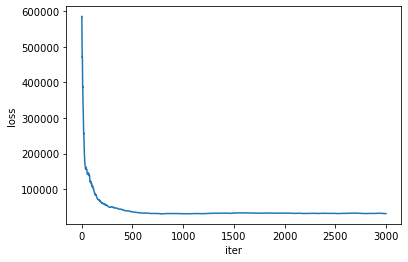

[array([1.28464028]), array([2.31105873])]


In [255]:
if __name__ == '__main__':
    observed_r, predicted_r, observed_e, propensities,O_mask = get_data()
    theta1,theta2,theta,loss_list = SGD(predicted_r, observed_e, propensities, step_size = 0.0001)
    print(theta)